In [175]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier, VotingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pickle

In [2]:
data = pd.read_csv("C:\Lachin\DataSets\Employee Attrition\WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Data Cleaning and Preprocessing

In [4]:
data.shape

(1470, 35)

In [5]:
data.size

51450

In [6]:
data.info()
#stockOptionlevel

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
data['Education'] = data['Education'].apply(str)

In [8]:
data['EnvironmentSatisfaction'] = data['EnvironmentSatisfaction'].apply(str)

In [9]:
data['JobInvolvement'] = data['JobInvolvement'].apply(str)
data['JobSatisfaction'] = data['JobSatisfaction'].apply(str)

In [10]:
data['PerformanceRating'] = data['PerformanceRating'].apply(str)
data['RelationshipSatisfaction'] = data['RelationshipSatisfaction'].apply(str)
data['WorkLifeBalance'] = data['WorkLifeBalance'].apply(str)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   object
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   object
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   object
 14  JobLevel                

In [12]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [13]:
data['JobLevel'].value_counts()

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64

In [14]:
data['JobLevel'] = data['JobLevel'].apply(str)

In [15]:
data['EmployeeCount'].value_counts()

1    1470
Name: EmployeeCount, dtype: int64

In [16]:
data.drop('EmployeeCount', axis=1, inplace = True)

In [17]:
data.shape

(1470, 34)

In [18]:
data['EmployeeNumber'].value_counts()

2048    1
1368    1
1364    1
1363    1
1362    1
       ..
648     1
647     1
645     1
644     1
2046    1
Name: EmployeeNumber, Length: 1470, dtype: int64

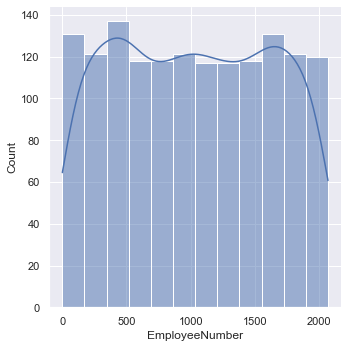

In [19]:
sns.set_theme()
sns.displot(data['EmployeeNumber'], kde=True);
#This data is uniform, so the variable can be removed

In [20]:
data.drop('EmployeeNumber', axis=1, inplace=True)

In [21]:
data['TrainingTimesLastYear'].value_counts()

2    547
3    491
4    123
5    119
1     71
6     65
0     54
Name: TrainingTimesLastYear, dtype: int64

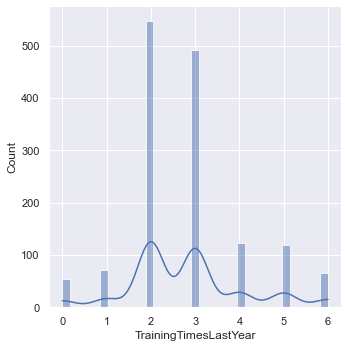

In [22]:
sns.displot(data['TrainingTimesLastYear'], kde=True)
#This categorical

In [23]:
data['TrainingTimesLastYear'] = data['TrainingTimesLastYear'].apply(str)

In [24]:
data['StockOptionLevel'].value_counts()
#categorical

0    631
1    596
2    158
3     85
Name: StockOptionLevel, dtype: int64

In [25]:
data['StockOptionLevel'] = data['StockOptionLevel'].apply(str)

In [26]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,4,80,1,6,3,3,2,2,2,2


In [27]:
Education = ['Below College' if i=='1' else 'College' if i=='2' else 'Bachelor' if i=='3' else 'Master' if i=='4' else 'Doctor' for i in data['Education']]

In [28]:
data['Education'] = Education

In [29]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,2,Female,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,3,Male,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,4,Male,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,4,Female,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,1,Male,...,4,80,1,6,3,3,2,2,2,2


In [30]:
data['EnvironmentSatisfaction'] = ['Low' if i=='1' else 'Medium' if i=='2' else 'High' if i=='3' else 'Very high' for i in data['EnvironmentSatisfaction']]

In [31]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,Medium,Female,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,High,Male,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,Very high,Male,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Very high,Female,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,Low,Male,...,4,80,1,6,3,3,2,2,2,2


In [32]:
data['JobInvolvement'] = ['Low' if i=='1' else 'Medium' if i=='2' else 'High' if i=='3' else 'Very high' for i in data['JobInvolvement']]

In [33]:
data['JobSatisfaction'] = ['Low' if i=='1' else 'Medium' if i=='2' else 'High' if i=='3' else 'Very high' for i in data['JobSatisfaction']]

In [34]:
data['PerformanceRating'] = ['Low' if i=='1' else 'Good' if i=='2' else 'Excellent' if i=='3' else 'Outstanding' for i in data['PerformanceRating']]

In [35]:
data['RelationshipSatisfaction'] = ['Low' if i=='1' else 'Medium' if i=='2' else 'High' if i=='3' else 'Very high' for i in data['RelationshipSatisfaction']]

In [36]:
data['WorkLifeBalance'] = ['Bad' if i=='1' else 'Good' if i=='2' else 'Better' if i=='3' else 'Best' for i in data['WorkLifeBalance']]

In [37]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,Medium,Female,...,Low,80,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,High,Male,...,Very high,80,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,Very high,Male,...,Medium,80,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Very high,Female,...,High,80,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,Low,Male,...,Very high,80,1,6,3,Better,2,2,2,2


In [38]:
data.describe()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,65.891156,6502.931293,14313.103401,2.693197,15.209524,80.0,11.279592,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,20.329428,4707.956783,7117.786044,2.498009,3.659938,0.0,7.780782,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,30.000000,1009.000000,2094.000000,0.000000,11.000000,80.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,48.000000,2911.000000,8047.000000,1.000000,12.000000,80.0,6.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,66.000000,4919.000000,14235.500000,2.000000,14.000000,80.0,10.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,83.750000,8379.000000,20461.500000,4.000000,18.000000,80.0,15.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,100.000000,19999.000000,26999.000000,9.000000,25.000000,80.0,40.000000,40.000000,18.000000,15.000000,17.000000


In [39]:
data['StandardHours'].value_counts()

80    1470
Name: StandardHours, dtype: int64

In [40]:
data.drop('StandardHours', axis=1, inplace = True)

In [41]:
data.describe()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,65.891156,6502.931293,14313.103401,2.693197,15.209524,11.279592,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,20.329428,4707.956783,7117.786044,2.498009,3.659938,7.780782,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,30.000000,1009.000000,2094.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,48.000000,2911.000000,8047.000000,1.000000,12.000000,6.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,66.000000,4919.000000,14235.500000,2.000000,14.000000,10.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,83.750000,8379.000000,20461.500000,4.000000,18.000000,15.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,100.000000,19999.000000,26999.000000,9.000000,25.000000,40.000000,40.000000,18.000000,15.000000,17.000000


In [42]:
df = data.describe()

In [43]:
len(df.columns)

13

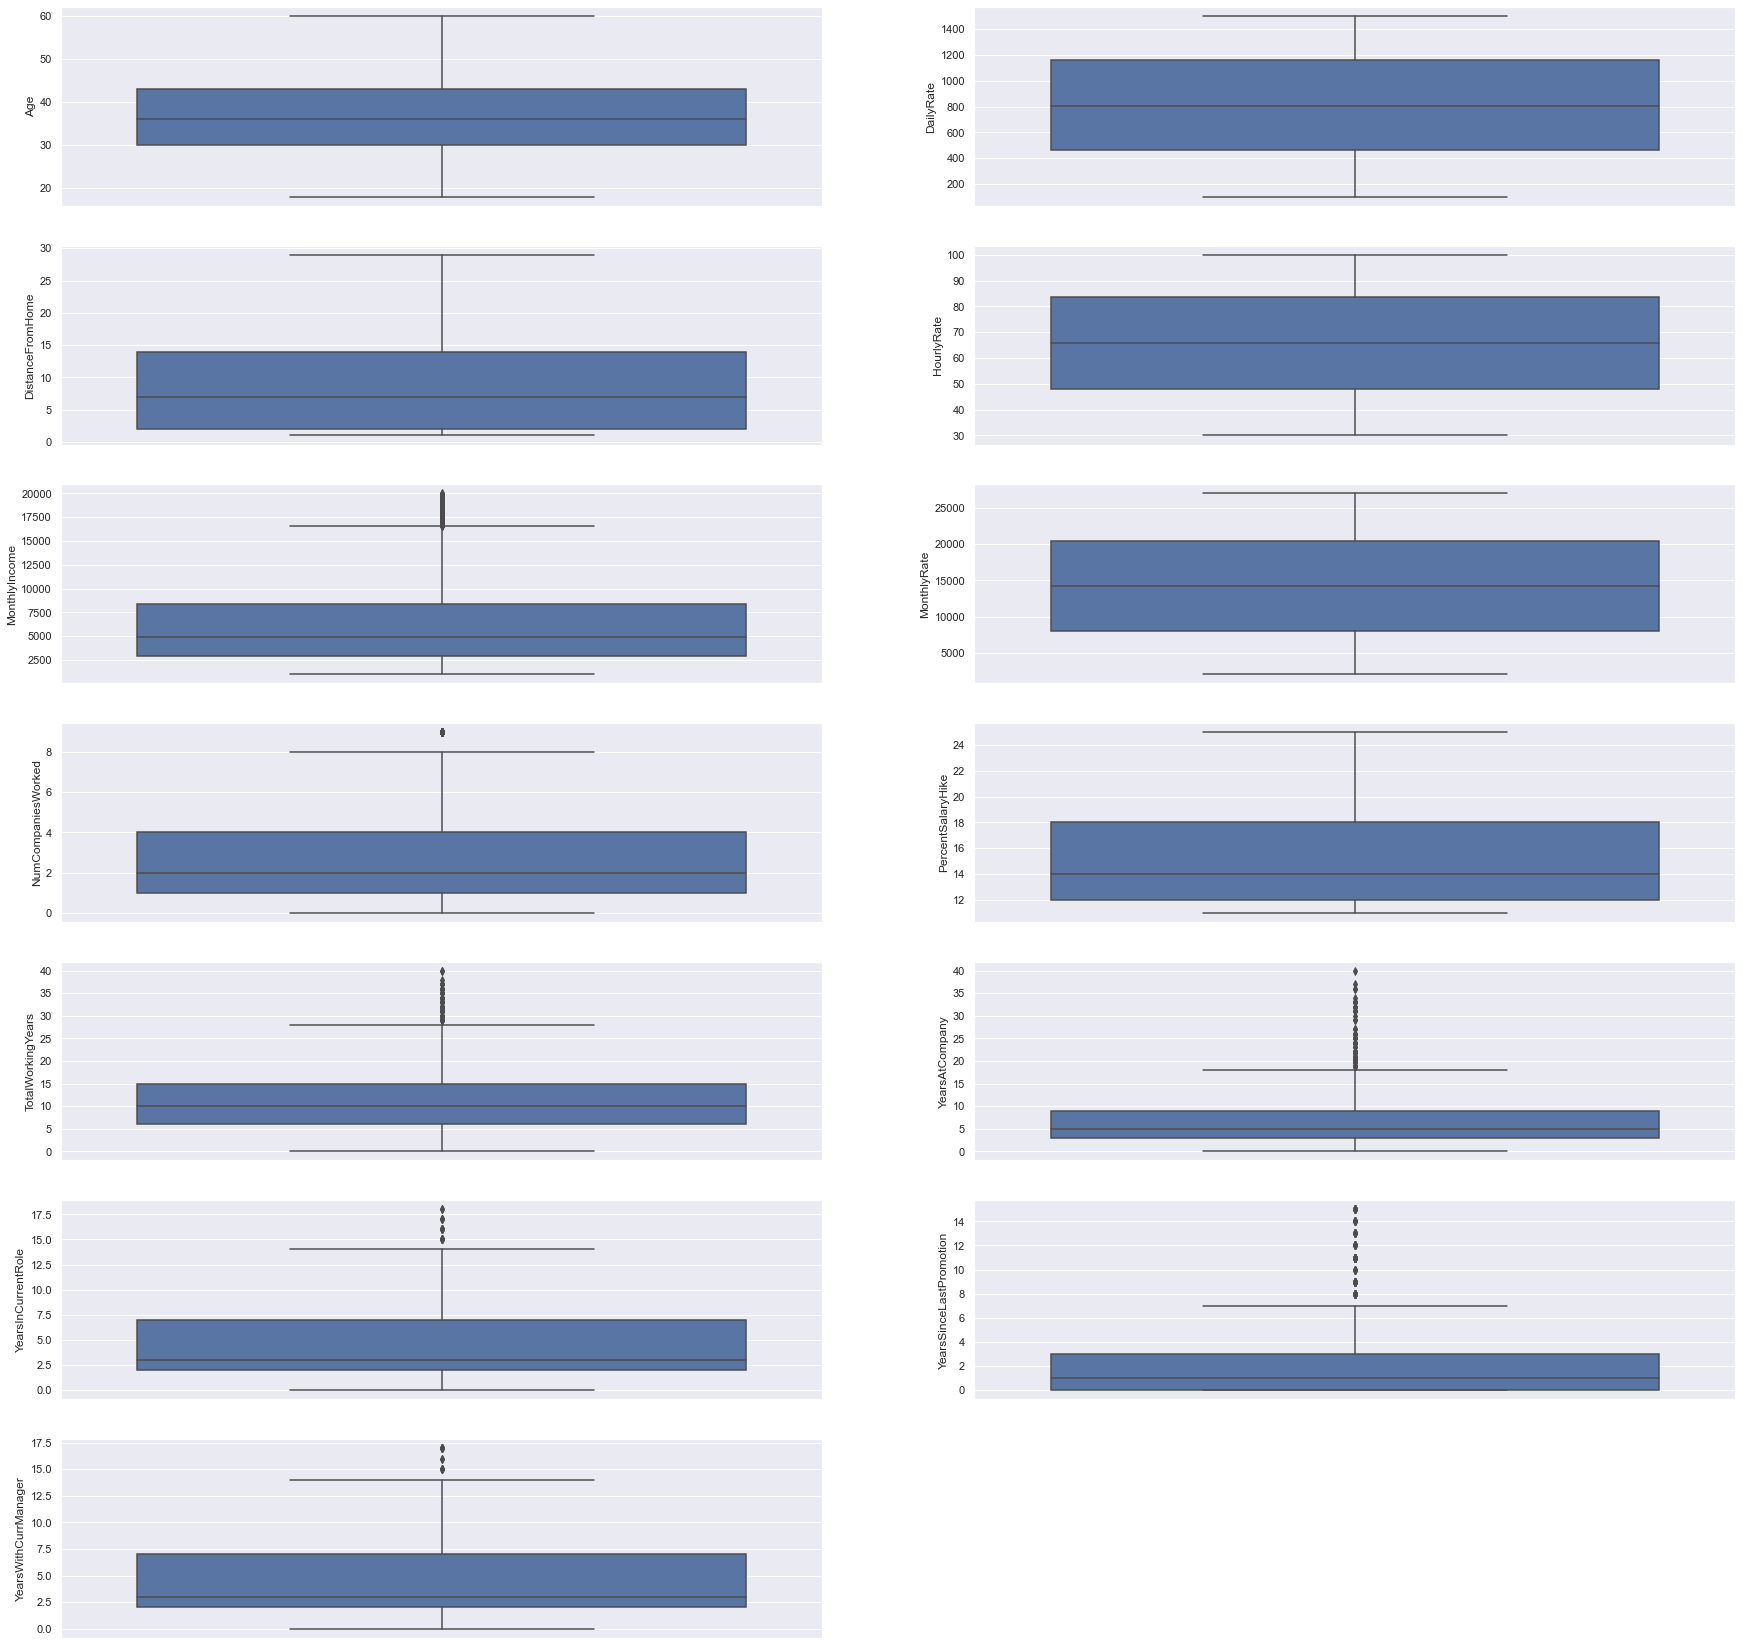

In [44]:
plt.figure(figsize = (30,30))
for i,j in enumerate(df.columns):
    plt.subplot(7,2,i+1)
    sns.boxplot(y= data[j])
plt.show()
    

In [45]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

In [46]:
outrows = ((data < (Q1 - 1.5*IQR))|(data >( Q3 + 1.5*IQR))).any(axis=1)

<ipython-input-46-7158675b9dd6>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outrows = ((data < (Q1 - 1.5*IQR))|(data >( Q3 + 1.5*IQR))).any(axis=1)
<ipython-input-46-7158675b9dd6>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outrows = ((data < (Q1 - 1.5*IQR))|(data >( Q3 + 1.5*IQR))).any(axis=1)


In [47]:
outrows

0       False
1       False
2       False
3       False
4        True
        ...  
1465    False
1466    False
1467    False
1468    False
1469    False
Length: 1470, dtype: bool

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

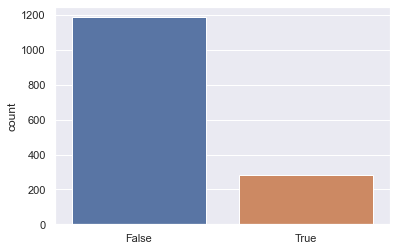

In [48]:
sns.countplot(outrows)

In [49]:
data1 = data.copy

In [50]:
print('Data shape before removing the outliers {}'.format(data.shape))
data = data[~outrows]
print('Data shape after removing the outliers {}'.format(data.shape))

Data shape before removing the outliers (1470, 32)
Data shape after removing the outliers (1187, 32)


In [51]:
data.isnull().sum()
#No missing values

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [52]:
data.duplicated().sum()
#No duplicates

0

### Data Analysis

In [53]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,Medium,Female,...,Excellent,Low,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,High,Male,...,Outstanding,Very high,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,Very high,Male,...,Excellent,Medium,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Very high,Female,...,Excellent,High,0,8,3,Better,8,7,3,0
5,32,No,Travel_Frequently,1005,Research & Development,2,College,Life Sciences,Very high,Male,...,Excellent,High,0,8,2,Good,7,7,3,6


In [54]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [55]:
df.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [56]:
categorical_data = []
for i in data.columns:
    if i in df.columns:
        pass
    else:
        categorical_data.append(i)

In [57]:
len(categorical_data)

19

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-p

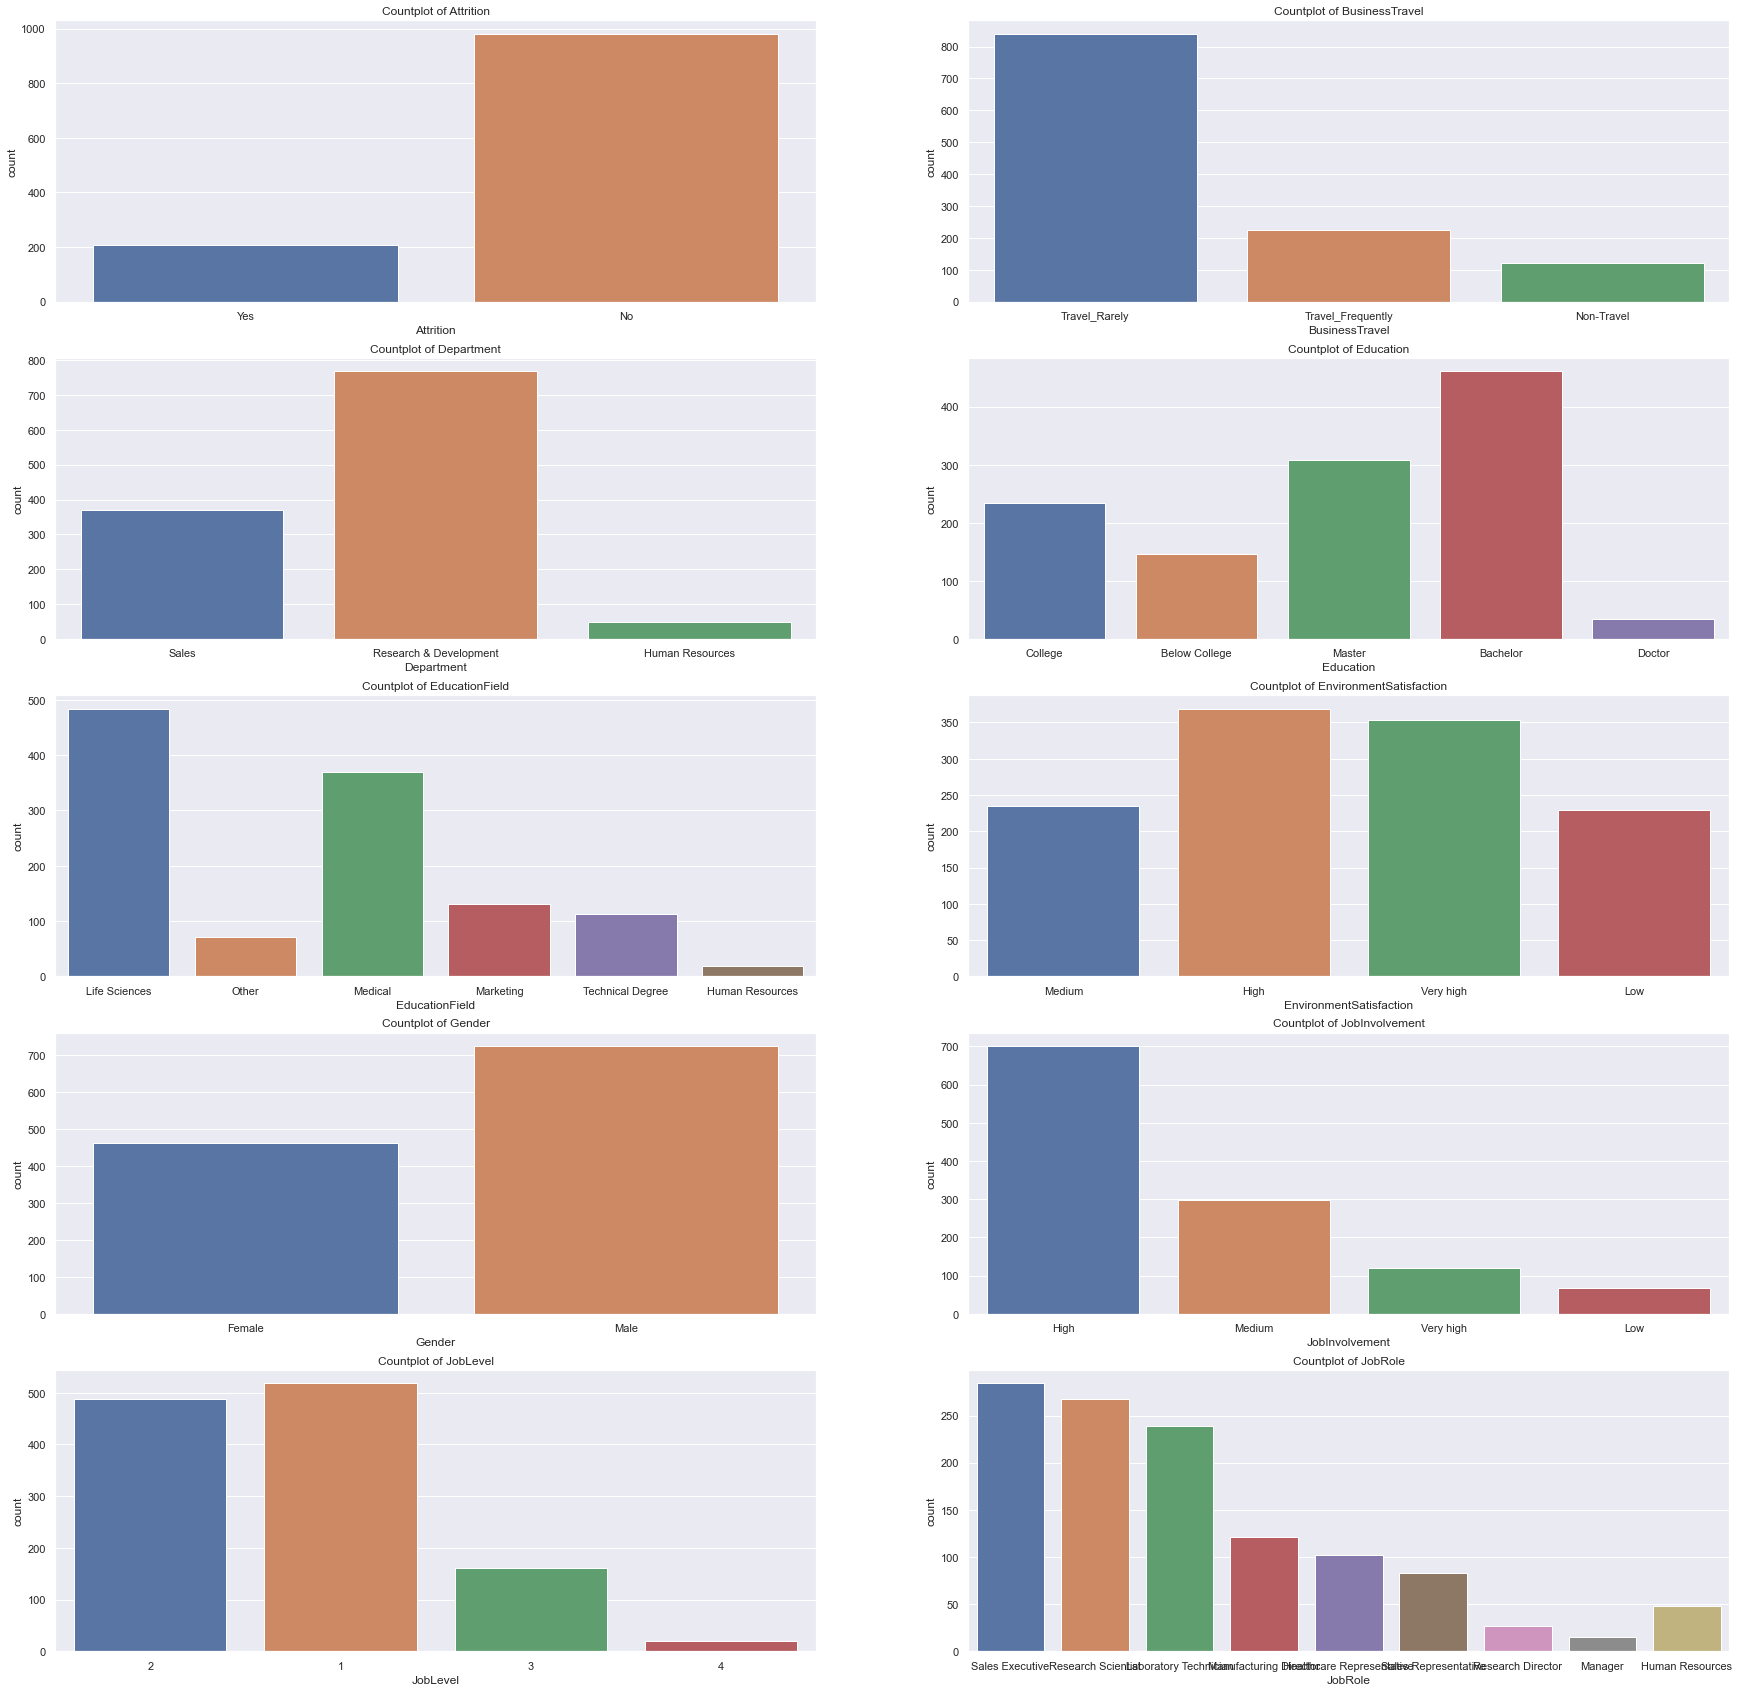

In [58]:
plt.figure(figsize=(30,30))
for i,j in enumerate(categorical_data):
    if (i <10):
        plt.subplot(5,2,i+1)
        sns.countplot(data[j])
        plt.title(f'Countplot of {j}')
    

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-p

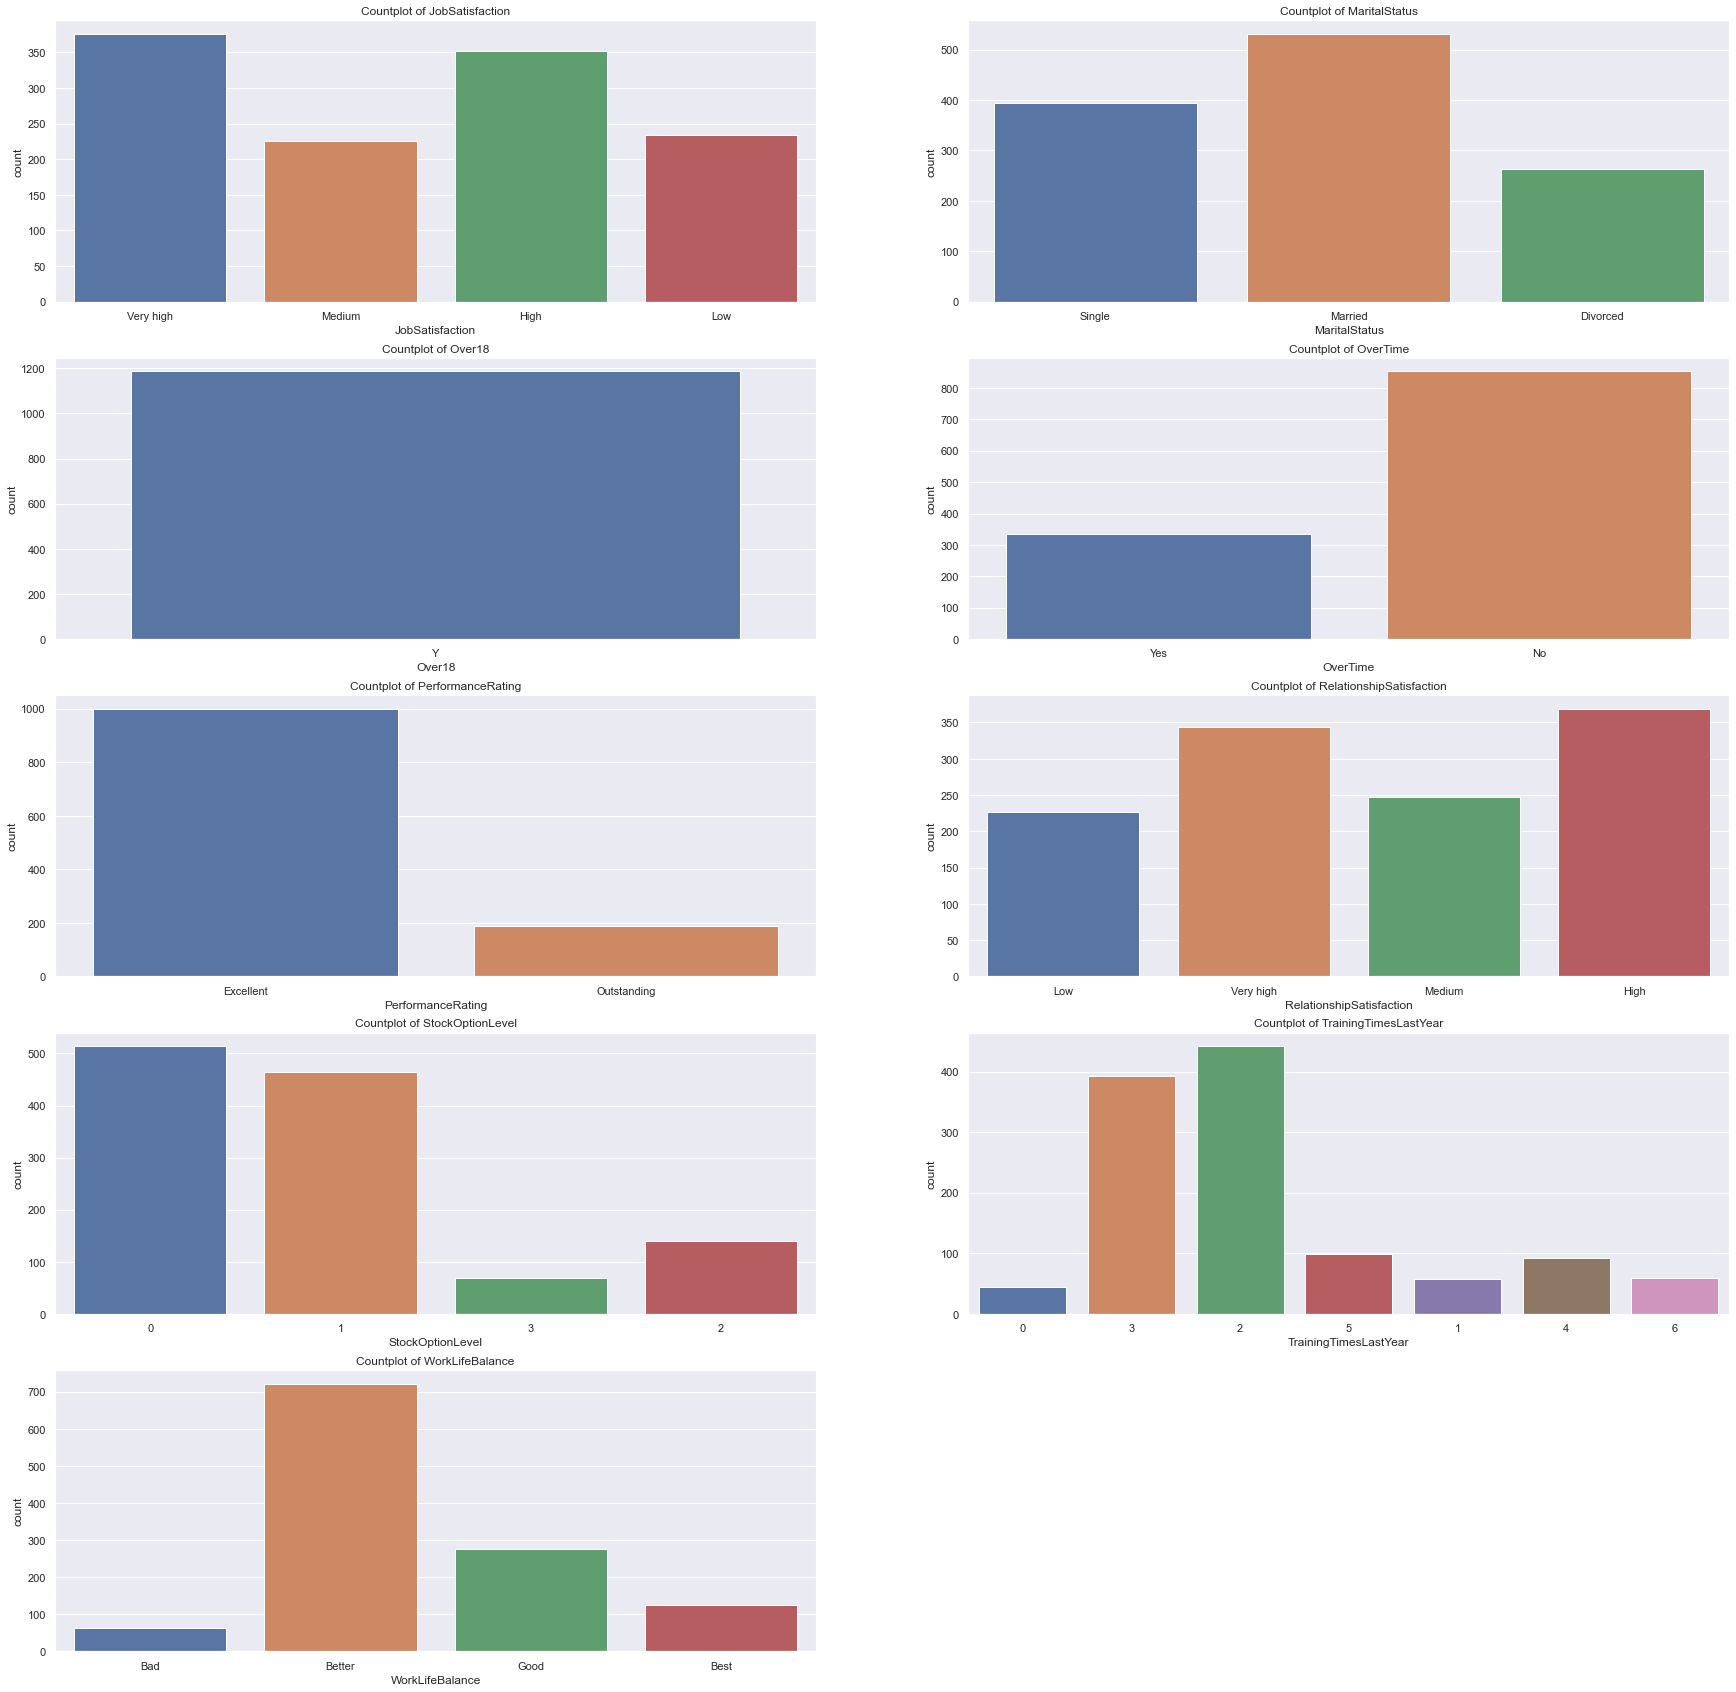

In [59]:
k=0
plt.figure(figsize=(30,30))
for i,j in enumerate(categorical_data):
    if (i >=10):
        plt.subplot(5,2,k+1)
        sns.countplot(data[j])
        plt.title(f'Countplot of {j}')
        k+=1

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Over18', ylabel='count'>

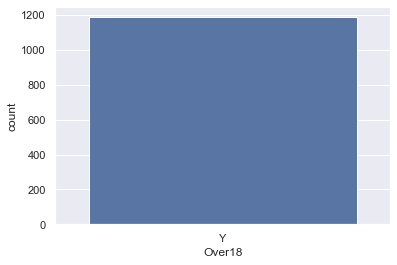

In [60]:
sns.countplot(data['Over18'])

In [61]:
data.drop('Over18', axis=1, inplace=True)

C:\Users\acer\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [62]:
data.shape

(1187, 31)

In [63]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,Medium,Female,...,Excellent,Low,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,High,Male,...,Outstanding,Very high,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,Very high,Male,...,Excellent,Medium,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Very high,Female,...,Excellent,High,0,8,3,Better,8,7,3,0
5,32,No,Travel_Frequently,1005,Research & Development,2,College,Life Sciences,Very high,Male,...,Excellent,High,0,8,2,Good,7,7,3,6


C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='JobRole', ylabel='count'>

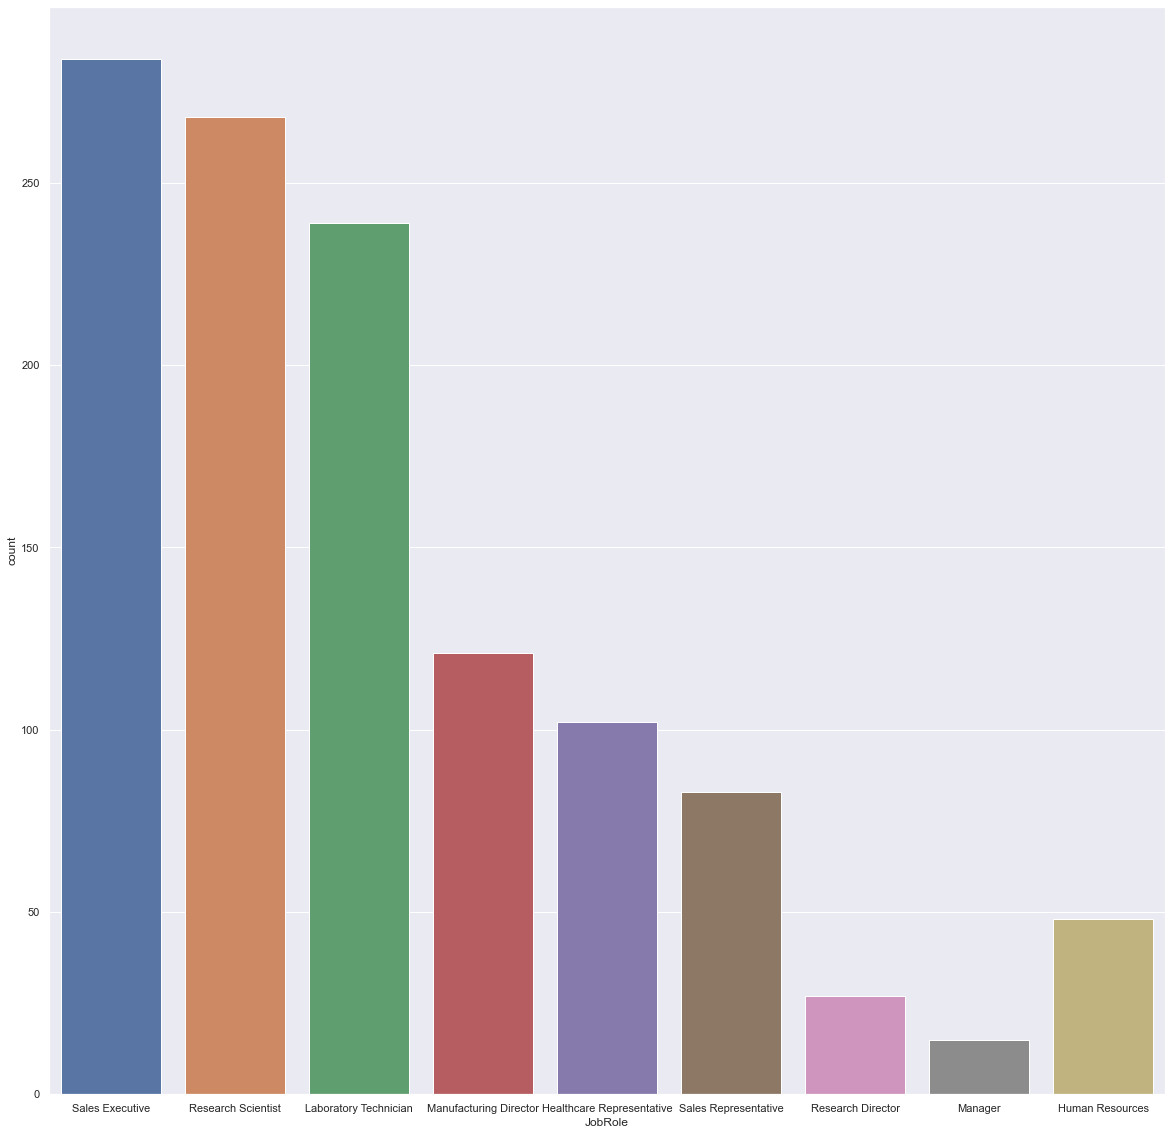

In [64]:
plt.figure(figsize=(20,20))
sns.countplot(data['JobRole'])

In [65]:
len(df.columns)

13

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

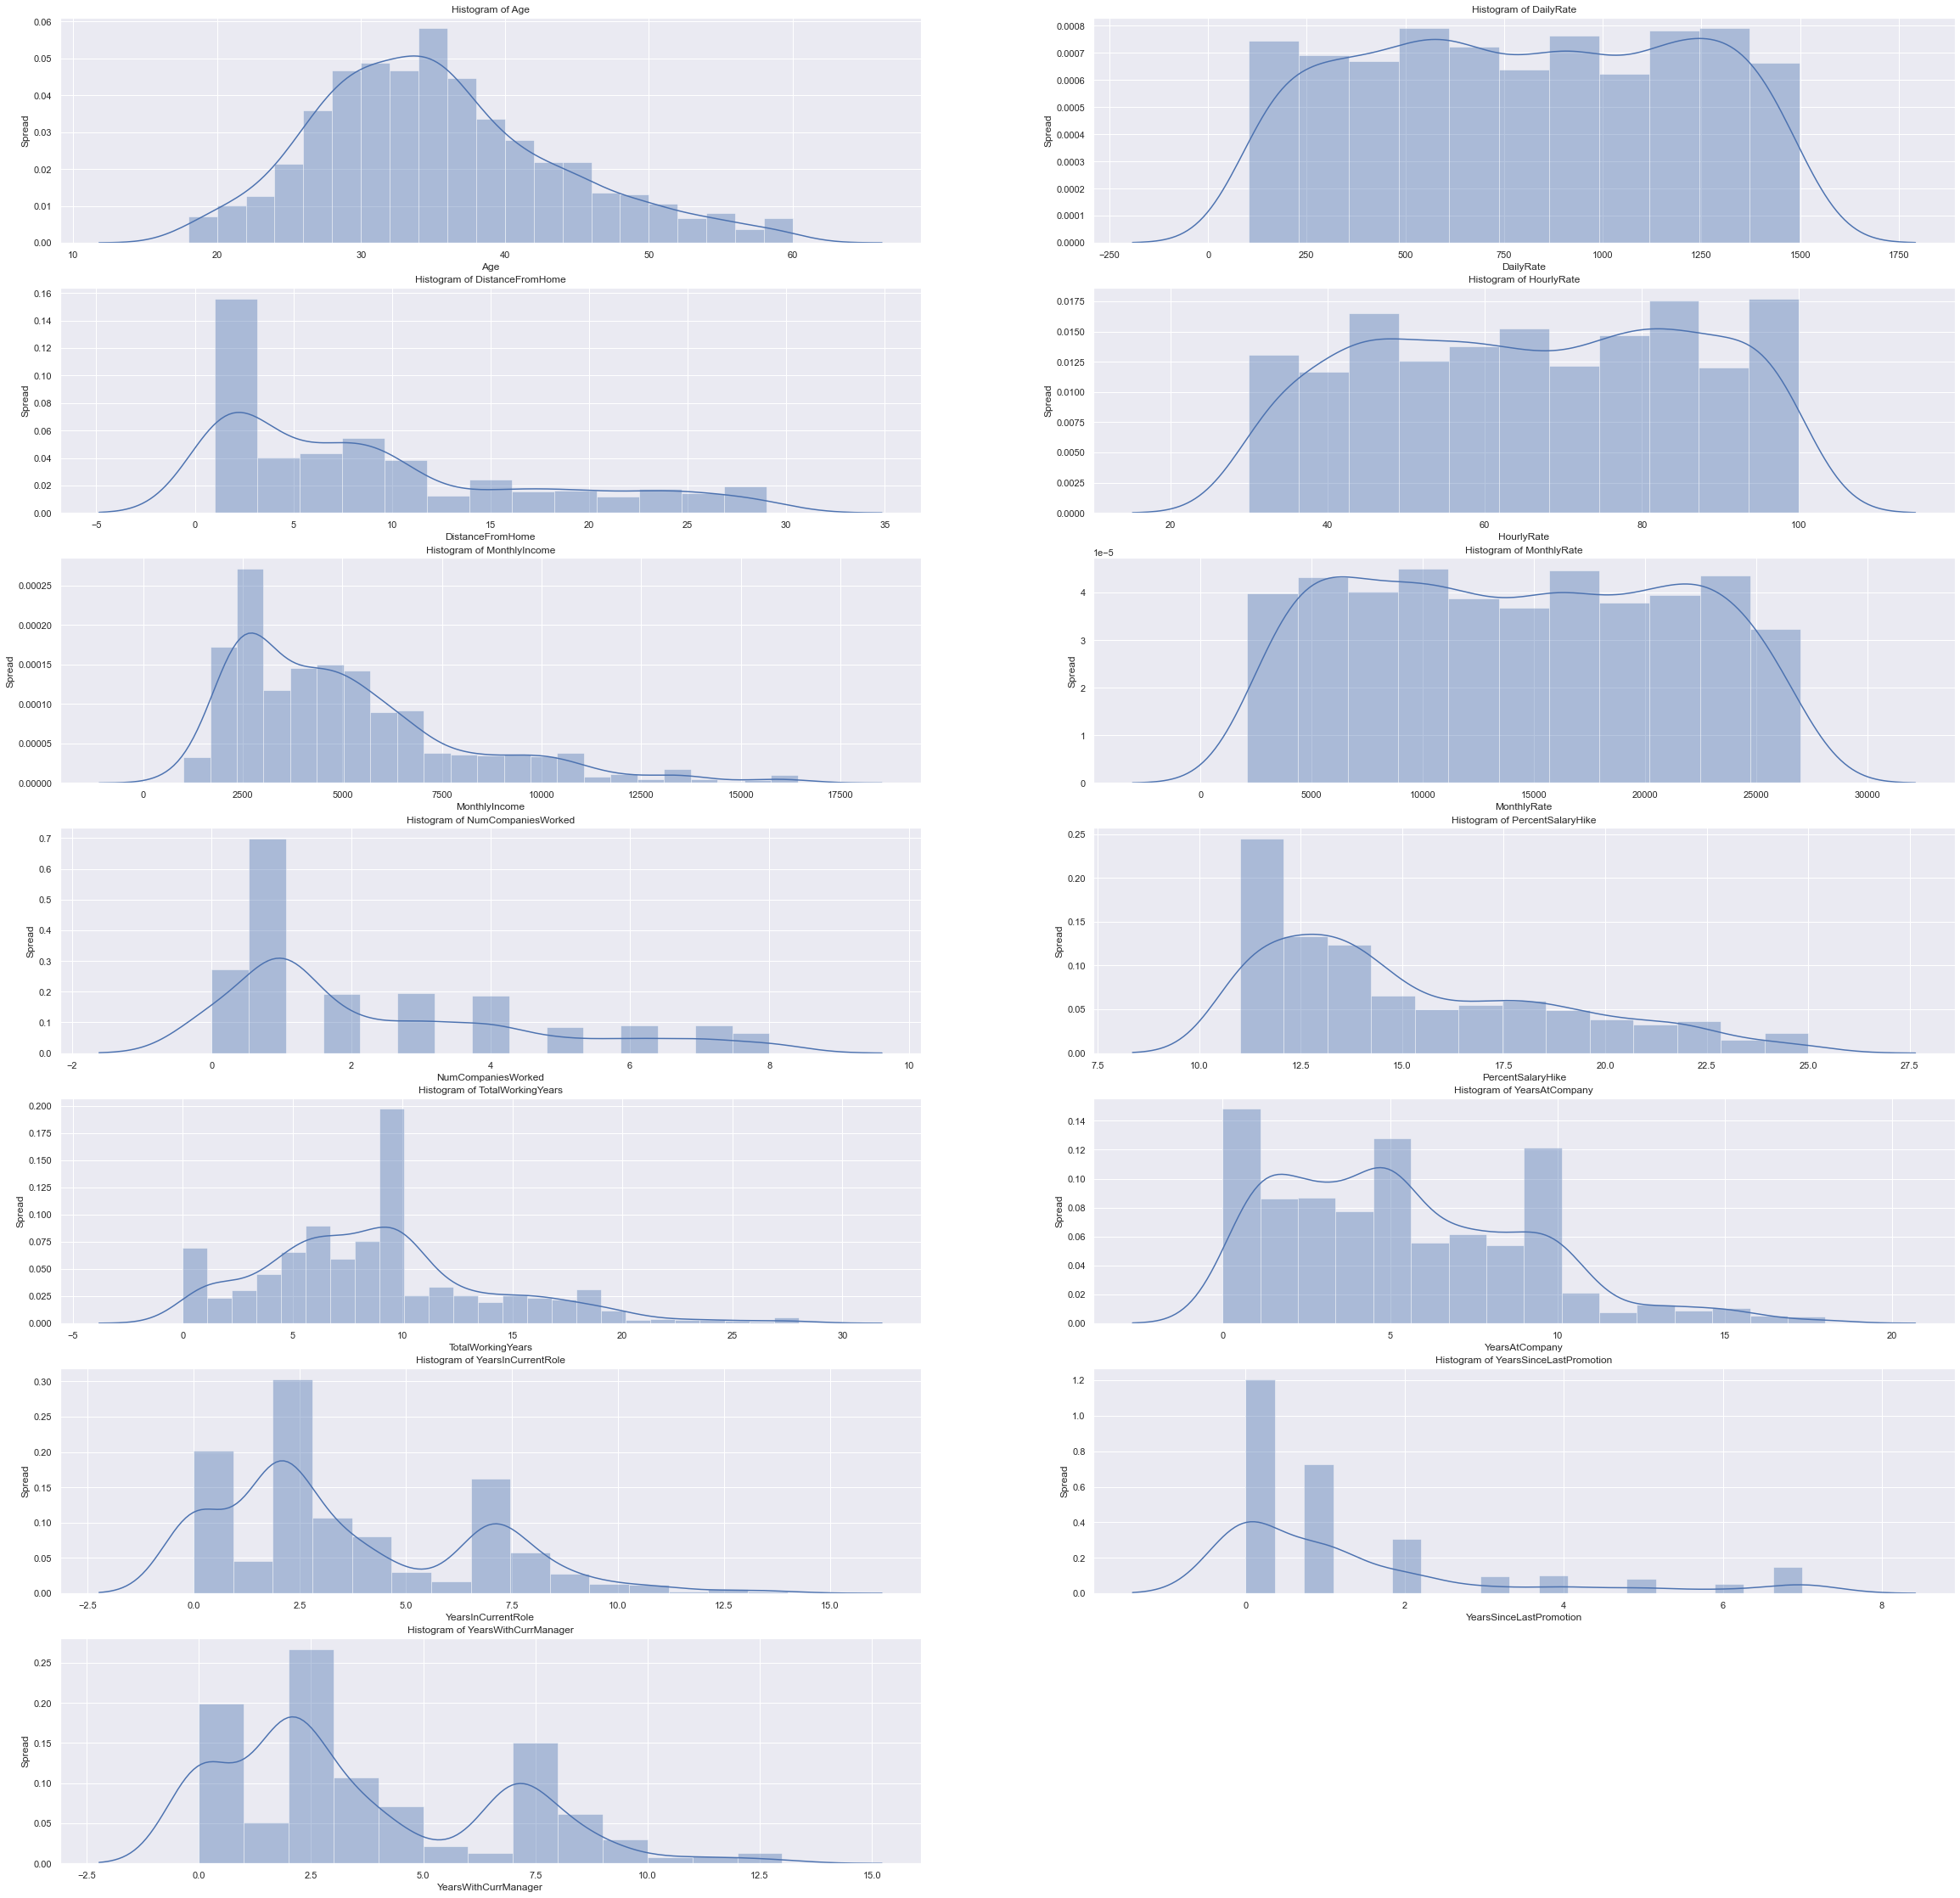

In [66]:
plt.figure(figsize=(40,40))
for i,j in enumerate(df.columns):
    plt.subplot(7,2,i+1)
    sns.distplot(data[j], kde=True)
    plt.title(f'Histogram of {j}')
    plt.xlabel(f'{j}')
    plt.ylabel('Spread')

In [67]:
data.shape

(1187, 31)

In [68]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,Medium,Female,...,Excellent,Low,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,High,Male,...,Outstanding,Very high,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,Very high,Male,...,Excellent,Medium,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Very high,Female,...,Excellent,High,0,8,3,Better,8,7,3,0
5,32,No,Travel_Frequently,1005,Research & Development,2,College,Life Sciences,Very high,Male,...,Excellent,High,0,8,2,Good,7,7,3,6


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1187 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1187 non-null   int64 
 1   Attrition                 1187 non-null   object
 2   BusinessTravel            1187 non-null   object
 3   DailyRate                 1187 non-null   int64 
 4   Department                1187 non-null   object
 5   DistanceFromHome          1187 non-null   int64 
 6   Education                 1187 non-null   object
 7   EducationField            1187 non-null   object
 8   EnvironmentSatisfaction   1187 non-null   object
 9   Gender                    1187 non-null   object
 10  HourlyRate                1187 non-null   int64 
 11  JobInvolvement            1187 non-null   object
 12  JobLevel                  1187 non-null   object
 13  JobRole                   1187 non-null   object
 14  JobSatisfaction         

Text(0.5, 1.0, 'breakdown of distance from home by job role and Attrition')

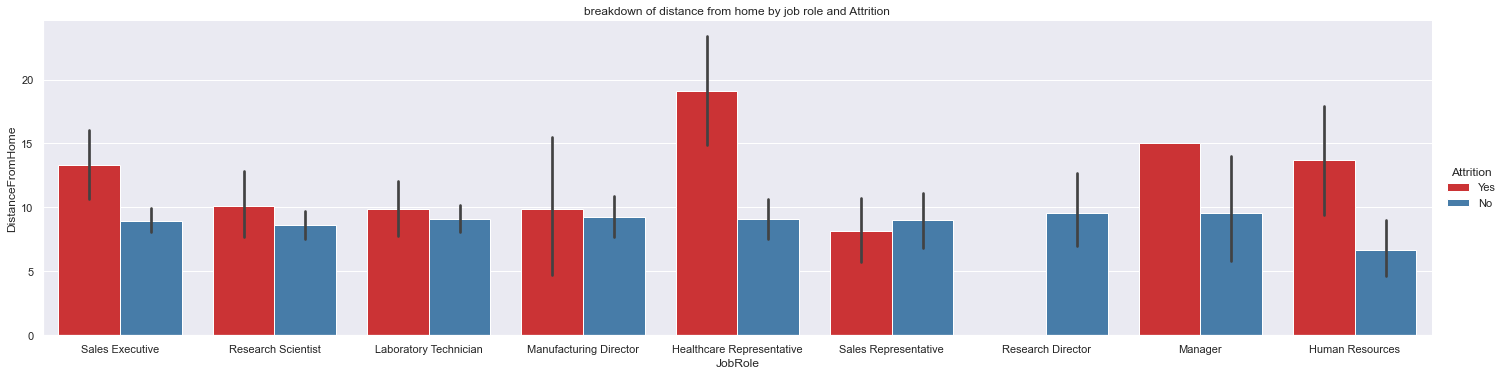

In [70]:
sns.catplot(data=data, x = 'JobRole',y='DistanceFromHome',hue='Attrition',kind='bar', height=5, aspect=4, palette='Set1');
plt.title('breakdown of distance from home by job role and Attrition')

Text(0.5, 1.0, 'breakdown of Monthly Income by Education and Attrition')

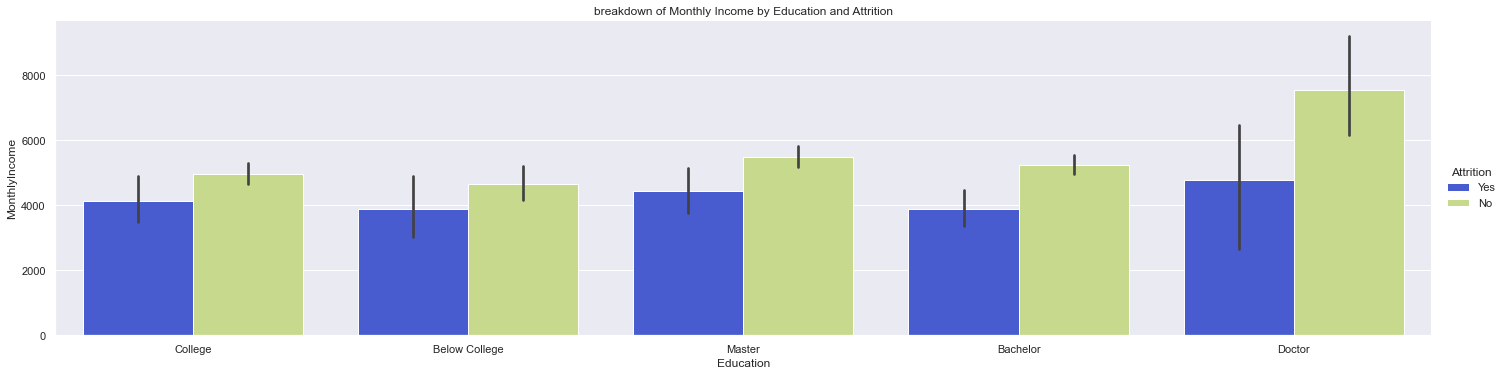

In [71]:
sns.catplot(data=data, x = 'Education',y='MonthlyIncome',hue='Attrition',kind='bar', height=5, aspect=4, palette=[(0.2,0.3,0.9),(0.8,0.9,0.5)]);
plt.title('breakdown of Monthly Income by Education and Attrition')

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


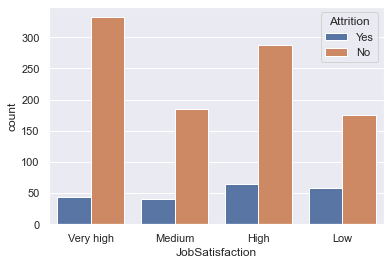

In [72]:
sns.countplot(data['JobSatisfaction'], hue=data['Attrition']);

<Figure size 432x432 with 0 Axes>

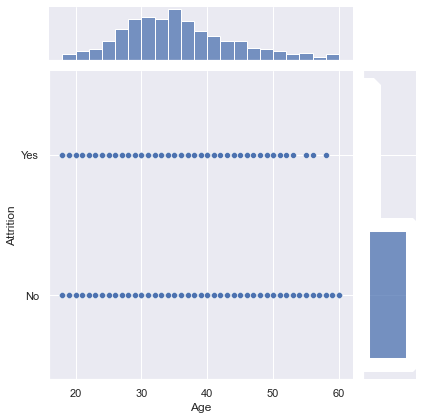

In [73]:
plt.figure(figsize=(6,6))
sns.jointplot(data=data, x = 'Age', y='Attrition')

<AxesSubplot:xlabel='Age', ylabel='Attrition'>

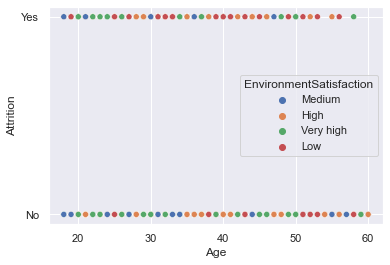

In [74]:
sns.scatterplot(data=data,x = 'Age', y='Attrition', hue='EnvironmentSatisfaction')

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

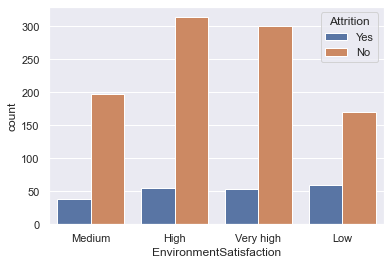

In [75]:
sns.countplot(data['EnvironmentSatisfaction'], hue=data['Attrition'])

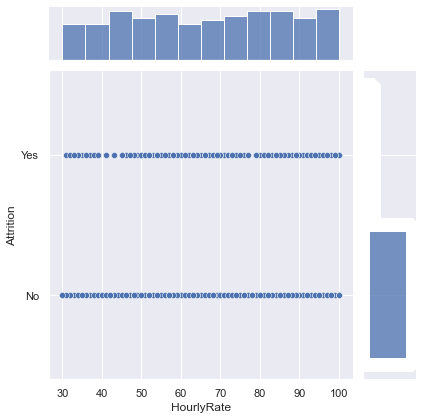

In [76]:
sns.jointplot(data=data, x= 'HourlyRate', y='Attrition')

In [77]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,Medium,Female,...,Excellent,Low,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,High,Male,...,Outstanding,Very high,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,Very high,Male,...,Excellent,Medium,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Very high,Female,...,Excellent,High,0,8,3,Better,8,7,3,0
5,32,No,Travel_Frequently,1005,Research & Development,2,College,Life Sciences,Very high,Male,...,Excellent,High,0,8,2,Good,7,7,3,6


In [78]:
li = LabelEncoder()

In [79]:
Attrition  = li.fit_transform(data['Attrition'])

In [80]:
Attrition

array([1, 0, 1, ..., 0, 0, 0])

In [81]:
data['Attrition'] = Attrition

<ipython-input-81-f443b2cb294e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Attrition'] = Attrition


In [82]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,College,Life Sciences,Medium,Female,...,Excellent,Low,0,8,0,Bad,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,High,Male,...,Outstanding,Very high,1,10,3,Better,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,College,Other,Very high,Male,...,Excellent,Medium,0,7,3,Better,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Very high,Female,...,Excellent,High,0,8,3,Better,8,7,3,0
5,32,0,Travel_Frequently,1005,Research & Development,2,College,Life Sciences,Very high,Male,...,Excellent,High,0,8,2,Good,7,7,3,6


In [83]:
data['Attrition'].dtype

dtype('int32')

In [84]:
categorical_data.remove('Attrition')

In [85]:
categorical_data.remove('Over18')

In [86]:
data = pd.get_dummies(data, columns=categorical_data, drop_first=True)

In [87]:
data.shape

(1187, 67)

In [88]:
data.head()

,Age,Attrition,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,...,StockOptionLevel_3,TrainingTimesLastYear_1,TrainingTimesLastYear_2,TrainingTimesLastYear_3,TrainingTimesLastYear_4,TrainingTimesLastYear_5,TrainingTimesLastYear_6,WorkLifeBalance_Best,WorkLifeBalance_Better,WorkLifeBalance_Good
0,41,1,1102,1,94,5993,19479,8,11,8,...,0,0,0,0,0,0,0,0,0,0
1,49,0,279,8,61,5130,24907,1,23,10,...,0,0,0,1,0,0,0,0,1,0
2,37,1,1373,2,92,2090,2396,6,15,7,...,0,0,0,1,0,0,0,0,1,0
3,33,0,1392,3,56,2909,23159,1,11,8,...,0,0,0,1,0,0,0,0,1,0
5,32,0,1005,2,79,3068,11864,0,13,8,...,0,0,1,0,0,0,0,0,0,1


### Feature Engineering

In [89]:
len(df.columns)

13

In [90]:
#Trying to reduce the nummber of parameters using PCA
pca = PCA(n_components=13)

In [91]:
df1 = data[df.columns]

In [92]:
df1.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,94,5993,19479,8,11,8,6,4,0,5
1,49,279,8,61,5130,24907,1,23,10,10,7,1,7
2,37,1373,2,92,2090,2396,6,15,7,0,0,0,0
3,33,1392,3,56,2909,23159,1,11,8,8,7,3,0
5,32,1005,2,79,3068,11864,0,13,8,7,7,3,6


In [93]:
df1.shape

(1187, 13)

In [94]:
#Normalising the data
stc = StandardScaler()
df1 = stc.fit_transform(df1)

In [95]:
df1 = pd.DataFrame(df1, columns=df.columns)

In [96]:
df1.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.684700,0.740034,-1.025030,1.361707,0.324709,0.732408,2.521641,-1.184366,-0.162828,0.167581,0.140560,-0.713555,0.487566
1,1.626324,-1.297571,-0.154886,-0.260933,0.027886,1.498659,-0.640018,2.124146,0.220657,1.250134,1.122000,-0.201160,1.142992
2,0.213888,1.410983,-0.900724,1.263365,-1.017702,-1.679137,1.618310,-0.081528,-0.354570,-1.456248,-1.168026,-0.713555,-1.150999
3,-0.256924,1.458024,-0.776417,-0.506788,-0.736012,1.251900,-0.640018,-1.184366,-0.162828,0.708858,1.122000,0.823632,-1.150999
4,-0.374627,0.499879,-0.900724,0.624143,-0.681325,-0.342574,-1.091684,-0.632947,-0.162828,0.438219,1.122000,0.823632,0.815279


In [97]:
pca.fit(df1)

PCA(n_components=13)

In [98]:
pca.explained_variance_

array([3.503227  , 1.85598824, 1.06926046, 1.03906832, 1.01457195,
       0.96580086, 0.91670353, 0.76364833, 0.6605837 , 0.59363312,
       0.27234842, 0.25528402, 0.10084326])

In [99]:
pca.explained_variance_ratio_.cumsum()

array([0.26925197, 0.41190002, 0.49408154, 0.57394253, 0.65192078,
       0.72615057, 0.79660681, 0.85529951, 0.90607083, 0.95169644,
       0.97262867, 0.99224936, 1.        ])

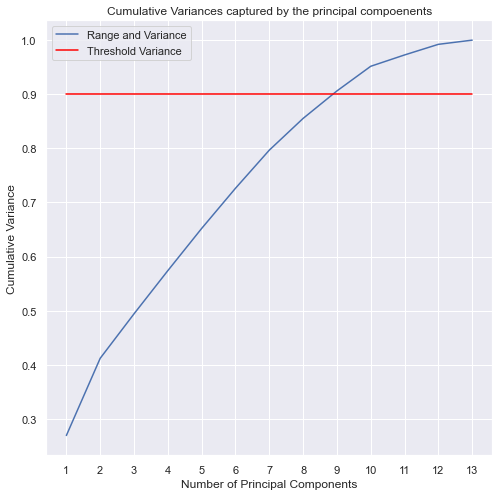

In [100]:
plt.figure(figsize = (8,8))
plt.plot(range(1,14),pca.explained_variance_ratio_.cumsum())
plt.plot(range(1,14),[0.9 for i in range(1,14)],c = 'red')
plt.title('Cumulative Variances captured by the principal compoenents')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance')
plt.legend(['Range and Variance','Threshold Variance'], loc='best')
plt.xticks(range(1,14));

In [101]:
#Selecting 9 principal compoenents which have 90% variance
pca1 = PCA(n_components=9)
df_pca = pca1.fit_transform(df1)

In [102]:
df_pca

array([[ 0.32423045,  1.77778909, -1.40811121, ..., -0.72596418,
         0.65000935, -1.71620525],
       [ 1.9578697 , -0.06736967,  1.93108479, ..., -2.07203812,
        -0.23309849, -0.07097397],
       [-2.35128411,  1.44809731, -2.554461  , ..., -0.03822716,
         0.75746921, -0.414802  ],
       ...,
       [-0.78294394, -0.77179058, -0.27083595, ..., -1.29922823,
        -1.23178623, -0.10047192],
       [ 2.22292033,  0.77219666, -1.00780648, ..., -0.312748  ,
        -0.80057692, -0.2473226 ],
       [-0.86943225, -0.24364904, -0.73160324, ...,  0.14248166,
        -0.14576455,  0.14391129]])

In [103]:
df_pca = pd.DataFrame(df_pca, columns=['PCA{}'.format(i) for i in range(1,10)])

In [104]:
df_pca.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9
0,0.324230,1.777789,-1.408111,-0.351121,-1.315378,0.981883,-0.725964,0.650009,-1.716205
1,1.957870,-0.067370,1.931085,-0.084173,0.943462,-0.480949,-2.072038,-0.233098,-0.070974
2,-2.351284,1.448097,-2.554461,1.188175,-0.019220,-0.191521,-0.038227,0.757469,-0.414802
3,0.258035,-1.007503,-0.417984,-0.547612,-0.328887,2.336101,0.145848,0.693077,0.445772
4,0.963582,-1.745691,-1.197844,0.038699,-0.546052,0.361667,-0.386072,0.221470,0.331258


In [105]:
df_pca.shape

(1187, 9)

In [106]:
data.drop(df.columns, axis=1, inplace=True)

In [107]:
data.shape

(1187, 54)

In [108]:
data.head()

,Attrition,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,Education_Below College,Education_College,Education_Doctor,Education_Master,EducationField_Life Sciences,...,StockOptionLevel_3,TrainingTimesLastYear_1,TrainingTimesLastYear_2,TrainingTimesLastYear_3,TrainingTimesLastYear_4,TrainingTimesLastYear_5,TrainingTimesLastYear_6,WorkLifeBalance_Best,WorkLifeBalance_Better,WorkLifeBalance_Good
0,1,0,1,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,1,0,1,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,1,0,1,0,0,0,0,1,1,...,0,0,0,1,0,0,0,0,1,0
5,0,1,0,1,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1


In [109]:
df_pca.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9
0,0.324230,1.777789,-1.408111,-0.351121,-1.315378,0.981883,-0.725964,0.650009,-1.716205
1,1.957870,-0.067370,1.931085,-0.084173,0.943462,-0.480949,-2.072038,-0.233098,-0.070974
2,-2.351284,1.448097,-2.554461,1.188175,-0.019220,-0.191521,-0.038227,0.757469,-0.414802
3,0.258035,-1.007503,-0.417984,-0.547612,-0.328887,2.336101,0.145848,0.693077,0.445772
4,0.963582,-1.745691,-1.197844,0.038699,-0.546052,0.361667,-0.386072,0.221470,0.331258


In [110]:
data.head()

,Attrition,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,Education_Below College,Education_College,Education_Doctor,Education_Master,EducationField_Life Sciences,...,StockOptionLevel_3,TrainingTimesLastYear_1,TrainingTimesLastYear_2,TrainingTimesLastYear_3,TrainingTimesLastYear_4,TrainingTimesLastYear_5,TrainingTimesLastYear_6,WorkLifeBalance_Best,WorkLifeBalance_Better,WorkLifeBalance_Good
0,1,0,1,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,1,0,1,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,1,0,1,0,0,0,0,1,1,...,0,0,0,1,0,0,0,0,1,0
5,0,1,0,1,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1


In [111]:
df_pca.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9
0,0.324230,1.777789,-1.408111,-0.351121,-1.315378,0.981883,-0.725964,0.650009,-1.716205
1,1.957870,-0.067370,1.931085,-0.084173,0.943462,-0.480949,-2.072038,-0.233098,-0.070974
2,-2.351284,1.448097,-2.554461,1.188175,-0.019220,-0.191521,-0.038227,0.757469,-0.414802
3,0.258035,-1.007503,-0.417984,-0.547612,-0.328887,2.336101,0.145848,0.693077,0.445772
4,0.963582,-1.745691,-1.197844,0.038699,-0.546052,0.361667,-0.386072,0.221470,0.331258


In [112]:
new_data = pd.concat([data,df_pca], axis=1)

In [113]:
data.reset_index(drop=True, inplace=True)

In [114]:
data.head()

,Attrition,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,Education_Below College,Education_College,Education_Doctor,Education_Master,EducationField_Life Sciences,...,StockOptionLevel_3,TrainingTimesLastYear_1,TrainingTimesLastYear_2,TrainingTimesLastYear_3,TrainingTimesLastYear_4,TrainingTimesLastYear_5,TrainingTimesLastYear_6,WorkLifeBalance_Best,WorkLifeBalance_Better,WorkLifeBalance_Good
0,1,0,1,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,1,0,1,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,1,0,1,0,0,0,0,1,1,...,0,0,0,1,0,0,0,0,1,0
4,0,1,0,1,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1


In [115]:
new_data = pd.concat([data, df_pca], axis=1)

In [116]:
new_data.shape

(1187, 63)

In [117]:
new_data.head()

,Attrition,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,Education_Below College,Education_College,Education_Doctor,Education_Master,EducationField_Life Sciences,...,WorkLifeBalance_Good,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9
0,1,0,1,0,1,0,1,0,0,1,...,0,0.324230,1.777789,-1.408111,-0.351121,-1.315378,0.981883,-0.725964,0.650009,-1.716205
1,0,1,0,1,0,1,0,0,0,1,...,0,1.957870,-0.067370,1.931085,-0.084173,0.943462,-0.480949,-2.072038,-0.233098,-0.070974
2,1,0,1,1,0,0,1,0,0,0,...,0,-2.351284,1.448097,-2.554461,1.188175,-0.019220,-0.191521,-0.038227,0.757469,-0.414802
3,0,1,0,1,0,0,0,0,1,1,...,0,0.258035,-1.007503,-0.417984,-0.547612,-0.328887,2.336101,0.145848,0.693077,0.445772
4,0,1,0,1,0,0,1,0,0,1,...,1,0.963582,-1.745691,-1.197844,0.038699,-0.546052,0.361667,-0.386072,0.221470,0.331258


In [119]:
new_data.shape

(1187, 63)

### Machine Learning

In [120]:
x = new_data.drop('Attrition', axis=1)
y = new_data['Attrition']

In [121]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [128]:
def classification(algo, x_train = x_train,x_test=x_test,y_train=y_train,y_test=y_test):
    global model
    model = algo
    model.fit(x_train,y_train)
    
    #Training Accuracies
    print('Training Accuracy'.center(40,'='))
    print(accuracy_score(y_train, model.predict(x_train)))
    
    #testing acuuracies
    y_pred = model.predict(x_test)
    print('Testing Accuracies'.center(40,'='))
    print(accuracy_score(y_test,y_pred))
    
    #confusion matrix
    plt.figure(figsize=(5,5))
    sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of Testing Data')
    plt.show()
    
    #classification report
    print(classification_report(y_test,y_pred))

#### Logistic Regression

===========Training Accuracy============
0.8977871443624869
===========Testing Accuracies===========
0.8949579831932774


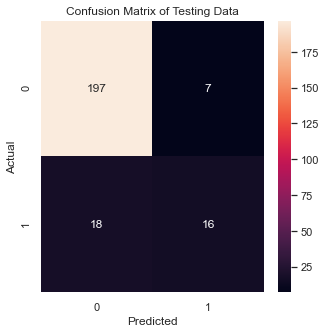

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       204
           1       0.70      0.47      0.56        34

    accuracy                           0.89       238
   macro avg       0.81      0.72      0.75       238
weighted avg       0.88      0.89      0.89       238



In [129]:
classification(LogisticRegression())
#More generalised model

#### KNN

===========Training Accuracy============
0.8556375131717597
===========Testing Accuracies===========
0.865546218487395


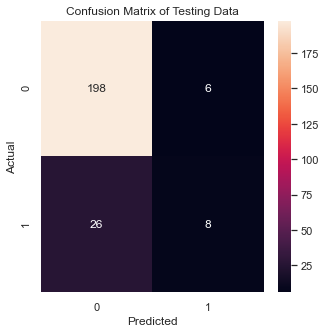

              precision    recall  f1-score   support

           0       0.88      0.97      0.93       204
           1       0.57      0.24      0.33        34

    accuracy                           0.87       238
   macro avg       0.73      0.60      0.63       238
weighted avg       0.84      0.87      0.84       238



In [130]:
classification(KNeighborsClassifier(n_neighbors=5))

In [131]:
K = [i for i in range(1,40)]
MCE = []
for i in K:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    MCE.append((1-accuracy_score(y_test,y_pred)))

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


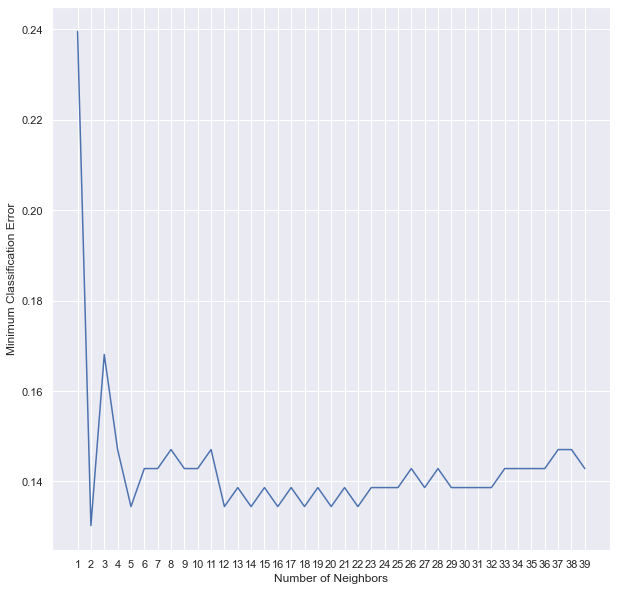

In [134]:
plt.figure(figsize=(10,10))
sns.lineplot(K, MCE)
plt.xlabel('Number of Neighbors')
plt.ylabel('Minimum Classification Error')
plt.title('Finding Optimal ')
plt.xticks(range(1,40))
plt.show()

===========Training Accuracy============
0.8619599578503688
===========Testing Accuracies===========
0.8697478991596639


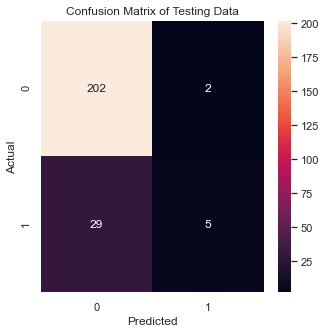

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       204
           1       0.71      0.15      0.24        34

    accuracy                           0.87       238
   macro avg       0.79      0.57      0.59       238
weighted avg       0.85      0.87      0.83       238



In [135]:
classification(KNeighborsClassifier(n_neighbors=2))

#### LDA

===========Training Accuracy============
0.8956796628029505
===========Testing Accuracies===========
0.8865546218487395


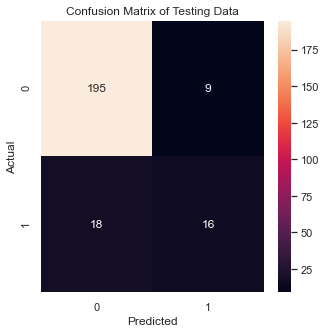

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       204
           1       0.64      0.47      0.54        34

    accuracy                           0.89       238
   macro avg       0.78      0.71      0.74       238
weighted avg       0.88      0.89      0.88       238



In [136]:
classification(LinearDiscriminantAnalysis())
#This model is also more generalised

### QDA

===========Training Accuracy============
0.24973656480505796
===========Testing Accuracies===========
0.20588235294117646


C:\Users\acer\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


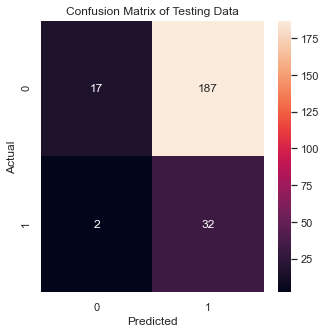

              precision    recall  f1-score   support

           0       0.89      0.08      0.15       204
           1       0.15      0.94      0.25        34

    accuracy                           0.21       238
   macro avg       0.52      0.51      0.20       238
weighted avg       0.79      0.21      0.17       238



In [138]:
classification(QuadraticDiscriminantAnalysis())
#since most of the variables categorical, lower results are visible

#### Naive Bayes

===========Training Accuracy============
0.2528977871443625
===========Testing Accuracies===========
0.2184873949579832


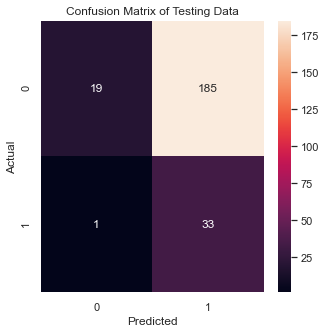

              precision    recall  f1-score   support

           0       0.95      0.09      0.17       204
           1       0.15      0.97      0.26        34

    accuracy                           0.22       238
   macro avg       0.55      0.53      0.22       238
weighted avg       0.84      0.22      0.18       238



In [139]:
classification(GaussianNB())

#### SVC

===========Training Accuracy============
0.9062170706006323
===========Testing Accuracies===========
0.8823529411764706


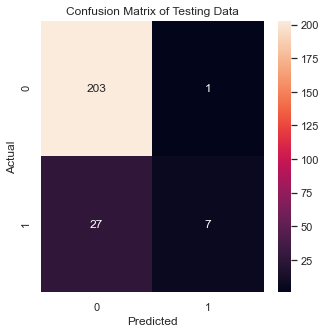

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       204
           1       0.88      0.21      0.33        34

    accuracy                           0.88       238
   macro avg       0.88      0.60      0.63       238
weighted avg       0.88      0.88      0.85       238



In [140]:
classification(SVC())
#model is more genralised

In [144]:
#Hyper parameter tuning
params = {'kernel':['linear','poly','rbf','sigmoid']}
model = SVC(C=3,kernel='linear')
gscv1 = GridSearchCV(model, params, cv=5, n_jobs=-1)
gscv1.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(C=3), n_jobs=-1,
             param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [145]:
gscv1.best_params_

{'kernel': 'linear'}

===========Training Accuracy============
0.9020021074815595
===========Testing Accuracies===========
0.8823529411764706


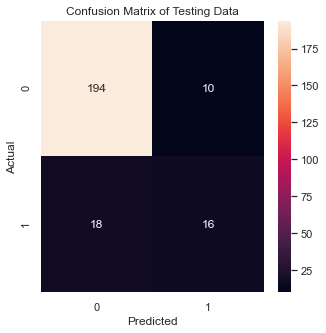

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       204
           1       0.62      0.47      0.53        34

    accuracy                           0.88       238
   macro avg       0.77      0.71      0.73       238
weighted avg       0.87      0.88      0.88       238



In [146]:
classification(SVC(C=3,kernel='linear'))

#### Decision Tree Classifier

===========Training Accuracy============
1.0
===========Testing Accuracies===========
0.7941176470588235


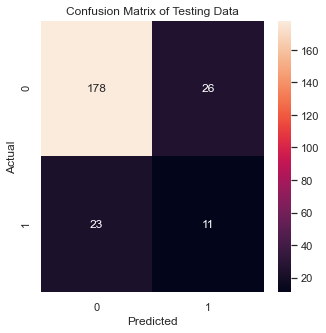

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       204
           1       0.30      0.32      0.31        34

    accuracy                           0.79       238
   macro avg       0.59      0.60      0.59       238
weighted avg       0.80      0.79      0.80       238



In [147]:
classification(DecisionTreeClassifier())
#overfitted

In [156]:
params = {'min_samples_leaf':range(1,100)}
model = DecisionTreeClassifier(criterion='entropy', max_depth=3,min_samples_split=60,min_samples_leaf=12)
gscv2 = GridSearchCV(model, params, cv=5, n_jobs=-1)
gscv2.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=3,
                                              min_samples_split=60),
             n_jobs=-1, param_grid={'min_samples_leaf': range(1, 100)})

In [157]:
gscv2.best_params_

{'min_samples_leaf': 12}

===========Training Accuracy============
0.8387776606954689
===========Testing Accuracies===========
0.8445378151260504


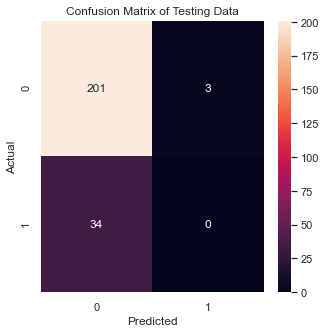

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       204
           1       0.00      0.00      0.00        34

    accuracy                           0.84       238
   macro avg       0.43      0.49      0.46       238
weighted avg       0.73      0.84      0.78       238



In [159]:
classification(DecisionTreeClassifier(criterion='entropy',splitter='random', max_depth=3,min_samples_split=60,min_samples_leaf=12))

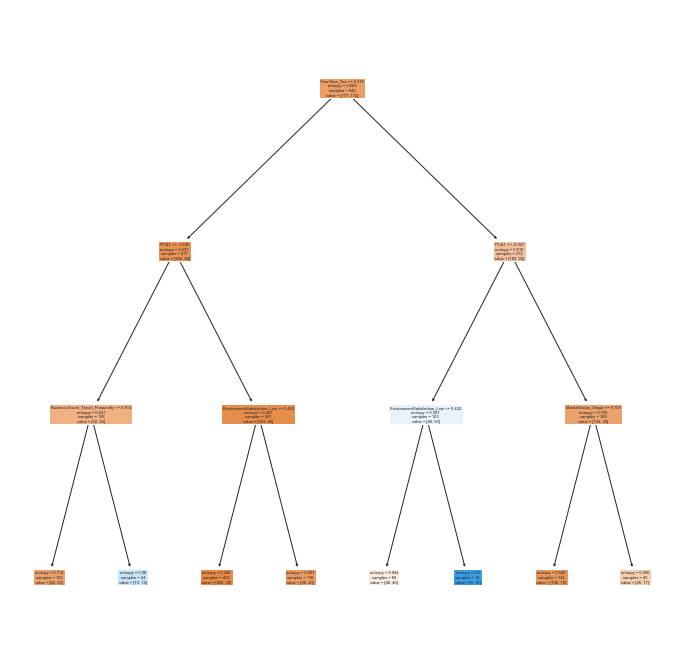

In [161]:
plt.figure(figsize=(12,12))
plot_tree(model, feature_names=x.columns, filled=True )
plt.show()

===========Training Accuracy============
1.0
===========Testing Accuracies===========
0.8739495798319328


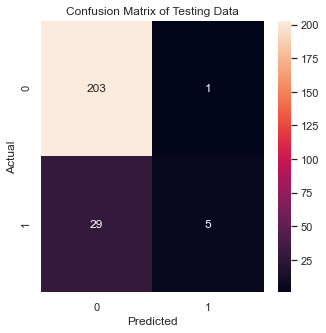

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       204
           1       0.83      0.15      0.25        34

    accuracy                           0.87       238
   macro avg       0.85      0.57      0.59       238
weighted avg       0.87      0.87      0.83       238



In [162]:
classification(RandomForestClassifier())

In [172]:
params = {'min_samples_leaf':range(1,100)}
model = RandomForestClassifier(n_estimators=49,criterion='entropy',max_depth=96, min_samples_split=3)
gscv3 = GridSearchCV(model,params, cv=5, n_jobs=-1)
gscv3.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy', max_depth=96,
                                              min_samples_split=3,
                                              n_estimators=49),
             n_jobs=-1, param_grid={'min_samples_leaf': range(1, 100)})

In [173]:
gscv3.best_params_

{'min_samples_leaf': 1}

===========Training Accuracy============
0.9989462592202318
===========Testing Accuracies===========
0.8697478991596639


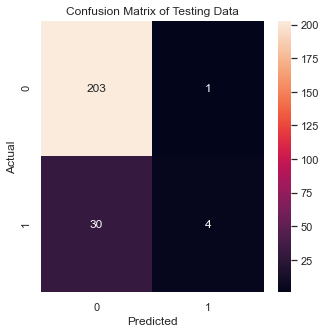

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       204
           1       0.80      0.12      0.21        34

    accuracy                           0.87       238
   macro avg       0.84      0.56      0.57       238
weighted avg       0.86      0.87      0.83       238



In [174]:
classification(RandomForestClassifier(n_estimators=49,criterion='entropy',max_depth=96, min_samples_split=3))
#overfitted

===========Training Accuracy============
0.8977871443624869
===========Testing Accuracies===========
0.8949579831932774


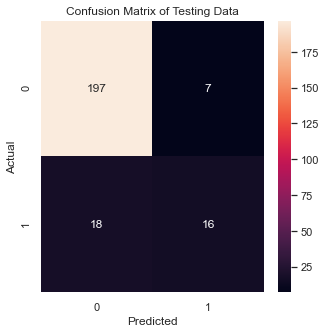

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       204
           1       0.70      0.47      0.56        34

    accuracy                           0.89       238
   macro avg       0.81      0.72      0.75       238
weighted avg       0.88      0.89      0.89       238



In [176]:
#selecting the best model as Logistic regression and saving it as pikle file
classification(LogisticRegression())

In [177]:
pickle.dump(model,open('Employee_Attrition.pkl','wb'))

In [178]:
file = 'C:\Lachin\DataSets\Employee Attrition\Employee_Attrition.pkl'
pickle.dump(model,open(file,'wb'))

In [ ]:
#For further experiments SMOTE or ADASYN can be used as over sampling techniques to balance the output variable